# On-Center and Off-Center Ganglion Cells- Simple Receptor Field

<h1>Introduction</h1>

In university, specifically physiology summer 2019 second year, I learned about receptor fields, specifically in the eye, specifically the retina and specifically the ganglion cells. I saw a visual like this one below:

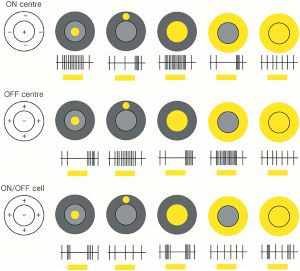


from : DOI:10.3389/fneur.2021.661938



Up till now my intuitive understanding of how eyes worked was similar to a camera, one cell per pixel. I could not have been more wrong. This was unintuitive and frankly earth shattering for me, and at the time I could not express well, my need to understand why. Two years later (after I learned how to code) I recreated it. I learned about Convolution Networks, then i had flashbackes to summer 2019 physiology. 

I could MAKE an eye or at least die trying.


<h1>Nessesary Imports</h1>

For this project, I will be using the Python Imaging Library (PIL) to import the image. I will also be using numpy for the matrices and matrix operations. I will also be using matplotlib for displaying the images.

In [30]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import math
import numpy as np
from numpy import asarray

<h1>1. Upload Image</h1>

To start we need an image (I choose a picture of this cute dog that I found in a stackoverflow post about dithering). I also started off with a black and white image which will make processing for now easier. The image can be converted into a numpu arrow of ones and zeros.


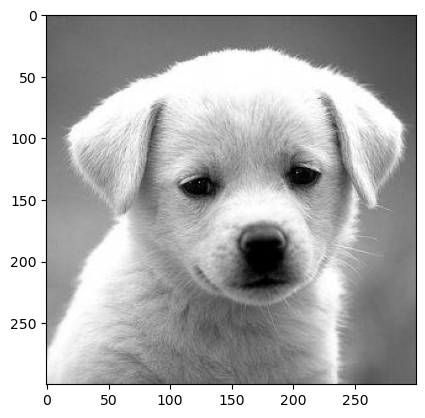

The shape of the image is: (300, 300)
The shape of the output is: (292, 291)


In [31]:

# Open the image
im = Image.open("dogg.jpg")


# Convert the image to grayscale
im = im.convert("L")

# I want it to be a square because that will make everything else easier.
# Get the size of the image
width, height = im.size

# Calculate the size of the square
new_size = min(width, height)

# Calculate the cropping box
left = (width - new_size) / 2
top = (height - new_size) / 2
right = (width + new_size) / 2
bottom = (height + new_size) / 2

# Crop the image
im_cropped = im.crop((left, top, right, bottom))

# Display the image
plt.imshow(im_cropped, cmap='gray')
plt.show()

# Convert the image to a NumPy array
data = np.asarray(im_cropped)

# Print the shape of the image
print(f"The shape of the image is: {data.shape}")

# Calculate the shape of the output
output_shape = (data.shape[0] - 9 + 1, data.shape[1] - 9)
print(f"The shape of the output is: {output_shape}")



Let's look at that last formula real quick

$$
data.shape[0] - 9 + 1, data.shape[1] - 9
$$

data.shape[0] is the number of rows of my image. 9 is the size of filter I will be using. And there is a + 1. (reference: Coursera). 

<h1>2. Create the filter</h1>

Based on this image:


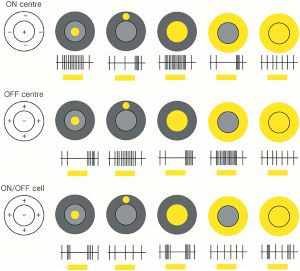

Let's try the On-Center ganglion cell. 
- If there is a signal in the middle of the field, there is an increase in neuron firing.
- If there is a signal in the outer part of the cell, there is an absence in neuron firing.
- If there is a signal in both areas there is less firing

<h2>Ok so let's make it</h2>



In [32]:
W = np.zeros((5,5)) + 100
W_1 = np.pad(W, ((2,2),(2,2)), mode='constant', constant_values = (-40,-40))
print(W_1)

[[-40. -40. -40. -40. -40. -40. -40. -40. -40.]
 [-40. -40. -40. -40. -40. -40. -40. -40. -40.]
 [-40. -40. 100. 100. 100. 100. 100. -40. -40.]
 [-40. -40. 100. 100. 100. 100. 100. -40. -40.]
 [-40. -40. 100. 100. 100. 100. 100. -40. -40.]
 [-40. -40. 100. 100. 100. 100. 100. -40. -40.]
 [-40. -40. 100. 100. 100. 100. 100. -40. -40.]
 [-40. -40. -40. -40. -40. -40. -40. -40. -40.]
 [-40. -40. -40. -40. -40. -40. -40. -40. -40.]]


This filter will be multiplied by 9x9 blocks in the orginal image. Each pixel in the original image is a 1 or a zero. Knowing this let's see if they follow the rules from before:
- If only the middle are ones, then (once I multiply then add up the numbers) I get: 2500 a large positive number
- If only the out side are ones, then I get:-2240 a large negative number, mimicking hyperpolarization
- If everything is luminated then I get: 260

This fits the picture from before

<h1>3. Perform a one step convolution</h1>

In [33]:
(n_H_old, n_W_old) = data.shape

f = 9
# set up new array
n_H = int((n_H_old-f) + 1)
n_W = int((n_W_old-f)+ 1)

Z_1 = np.zeros((n_H,n_W))



for h in range(n_H):
    # gets the starting and ending of the verticle indexes
    vert_start = h
    vert_end = vert_start + f
    for w in range(n_W):
        # gets the starting and ending of the horizontal indexes
        horiz_start = w
        horiz_end = horiz_start + f
        # gets a slice of data from the original data array
        slice_of_data = data[vert_start:vert_end, horiz_start:horiz_end]
        # multiply the daa slice by the filter
        s = slice_of_data * W_1
        # add it up
        number = np.sum(s)/81
            
        # that will be the value of the new pixel
        Z_1[h][w] = number

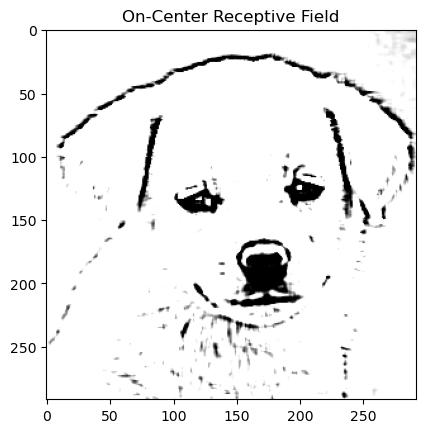

In [34]:
new  = Image.fromarray(Z_1)
plt.imshow(new)
plt.title("On-Center Receptive Field")
plt.show()

<h1>Its an edge detector!</h1>

<h1>Let's try an off-center ganglion cell</h1>

In [35]:
W = np.zeros((5,5)) + -100
W_2 = np.pad(W, ((2,2),(2,2)), mode='constant', constant_values = (50,50))
print(W_2)

[[  50.   50.   50.   50.   50.   50.   50.   50.   50.]
 [  50.   50.   50.   50.   50.   50.   50.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50.   50.   50.   50.   50.   50.   50.   50.]
 [  50.   50.   50.   50.   50.   50.   50.   50.   50.]]


In [36]:
(n_H_old, n_W_old) = data.shape

f = 9
# set up new array
n_H = int((n_H_old-f) + 1)
n_W = int((n_W_old-f)+ 1)

Z_2 = np.zeros((n_H,n_W))



for h in range(n_H):
    # gets the starting and ending of the verticle indexes
    vert_start = h
    vert_end = vert_start + f
    for w in range(n_W):
        # gets the starting and ending of the horizontal indexes
        horiz_start = w
        horiz_end = horiz_start + f
        # gets a slice of data from the original data array
        slice_of_data = data[vert_start:vert_end, horiz_start:horiz_end]
        # multiply the daa slice by the filter
        s = slice_of_data * W_2
        # add it up
        number = np.sum(s)/81
            
        # that will be the value of the new pixel
        Z_2[h][w] = number

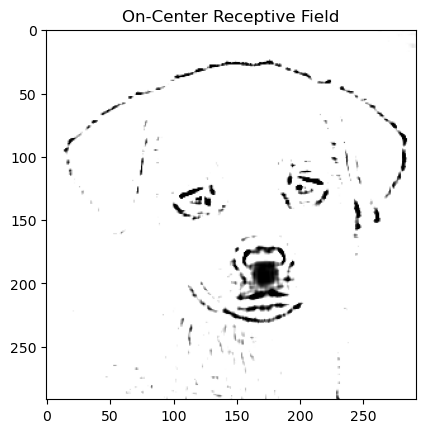

In [37]:
new  = Image.fromarray(Z_2)
plt.imshow(new)
plt.title("On-Center Receptive Field")
plt.show()

<h1>Weird! its inverted</h1>

<h1>Alternating On and Off ganglion cells</h1>

In [38]:
(n_H_old, n_W_old) = data.shape

f = 9

n_H = int((n_H_old-f) + 1)
n_W = int((n_W_old-f)+ 1)

Z_3 = np.zeros((n_H,n_W))

W = [W_1,W_2]

for h in range(n_H):
    vert_start = h
    vert_end = vert_start + f
    i = 0
    for w in range(n_W):
        horiz_start = w
        horiz_end = horiz_start + f
        slice_of_data = data[vert_start:vert_end, horiz_start:horiz_end]
        if i%2 == 0:
            s = slice_of_data * W_1
            number = np.sum(s)/81
        else:
            s = slice_of_data * W_2
            number = np.sum(s)/81
        i += 1
            
            
        Z_3[h][w] = number


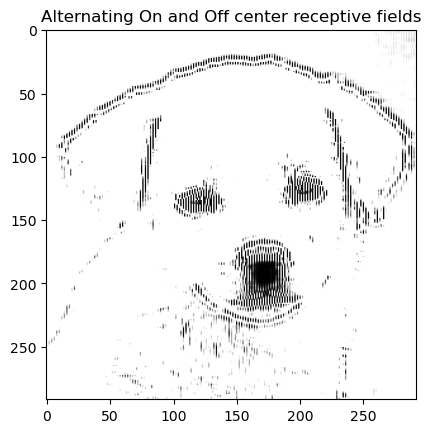

In [39]:

new  = Image.fromarray(Z_3)
plt.imshow(new)
plt.title("Alternating On and Off center receptive fields")
plt.show()

<h1>Next Steps</h1>

1. find the distribution of on and off ganglion cells.
2. try it with images with colour
3. i want to try it with real firing rates and not just numbers